<a href="https://colab.research.google.com/github/Jessica1842553/MCDaa2025/blob/main/T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 3 - Jessica Lizeth Hernández Bracho 1842553

In [1]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [3]:
# Carga conjunto de datos
df = pd.read_csv('/content/student-mat.csv', sep=";")
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# Variables de interés
variables_interes = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
df_sub = df[variables_interes]

In [5]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 640x480 with 0 Axes>

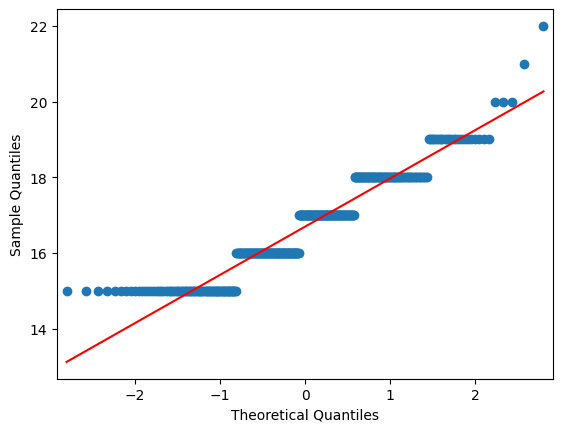

In [6]:
plt.figure()
qqplot(df_sub.age, line ='s')
plt.show()

#variables_interes = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']

#### | Sustituyendo las variables de interés en esta prueba rapida de normalidad, se concluye que son datos **no paramétricos.**

### _**Estadísticos Descriptivos**_

In [7]:
# Estadísticos descriptivos de las variables de interés
estad = df_sub.describe()
display(estad)

,age,studytime,failures,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


### _**Correlación**_

In [9]:
# Correlación de las variables de interés
df[variables_interes].corr()

,age,studytime,failures,absences,G1,G2,G3
age,1.000000,-0.004140,0.243665,0.175230,-0.064081,-0.143474,-0.161579
studytime,-0.004140,1.000000,-0.173563,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.173563,1.000000,0.063726,-0.354718,-0.355896,-0.360415
absences,0.175230,-0.062700,0.063726,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,0.160612,-0.354718,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,0.135880,-0.355896,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.097820,-0.360415,0.034247,0.801468,0.904868,1.000000


In [10]:
corr_varin = df_sub.corr()

<Figure size 640x480 with 0 Axes>

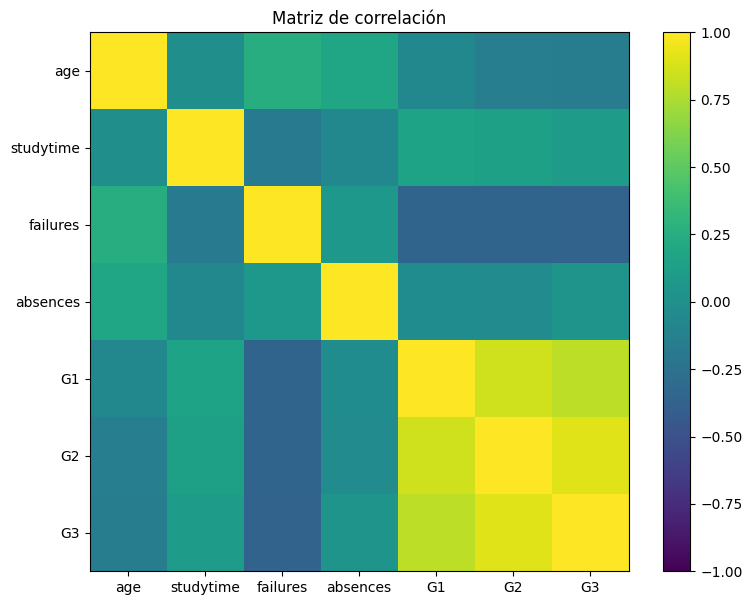

In [11]:
plt.figure()
plt.figure(figsize=(9, 7))
plt.imshow(corr_varin)

plt.title('Matriz de correlación')
plt.xticks(range(len(corr_varin)), corr_varin.columns)
plt.yticks(range(len(corr_varin)), corr_varin.columns)

plt.clim(vmin=-1, vmax=1)
plt.colorbar()

plt.show()

#### Conclusiones:
- Las variables G1, G2 y G3 (calificaciones de los periodos), tienen una correlacion positiva y fuerte entre ellas.
- La mayoría de las variables tienen una correlación positiva moderada.
- La variable failures (número de materias reprodas anteriormente), es la que se muestra con una mayor correlación negativa en comparación con las demás.

### _**Prueba de Hipótesis**_

In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Crear grupos según faltas
mean_absences = df['absences'].mean()
grupo_bajas = df[df['absences'] < mean_absences]['G3']
grupo_altas = df[df['absences'] >= mean_absences]['G3']

# Prueba t de Student para muestras independientes
t_stat, p_value = ttest_ind(grupo_bajas, grupo_altas, equal_var=False)

print(f"Media G3 - Faltas bajas: {grupo_bajas.mean():.4f}")
print(f"Media G3 - Faltas altas: {grupo_altas.mean():.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Se rechaza H₀: hay diferencia significativa en G3 entre los grupos.")
else:
    print("No se rechaza H₀: no hay diferencia significativa en G3 entre los grupos.")

Media G3 - Faltas bajas: 10.1687
Media G3 - Faltas altas: 10.8356
t-statistic: -1.5676
p-value: 0.1178
No se rechaza H₀: no hay diferencia significativa en G3 entre los grupos.


#### Dado que el valor p = 0.1178 > 0.05, no se puede rechazar la hipótesis nula.
No hay evidencia estadísticamente significativa de que las ausencias afecten directamente el promedio final (G3).

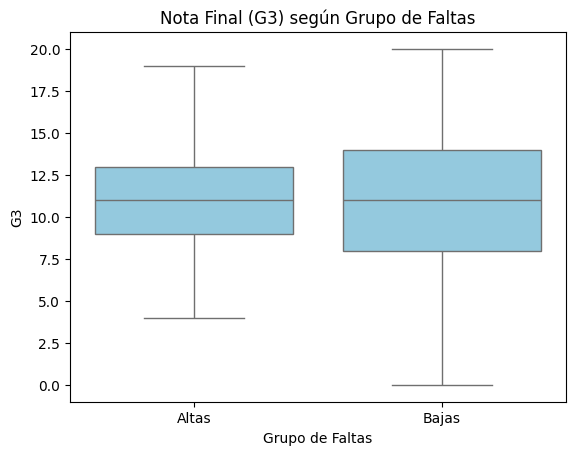

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['grupo_faltas'] = ['Bajas' if x < mean_absences else 'Altas' for x in df['absences']]
sns.boxplot(data=df, x='grupo_faltas', y='G3', color = 'skyblue')
plt.title('Nota Final (G3) según Grupo de Faltas')
plt.xlabel('Grupo de Faltas')
plt.ylabel('G3')
plt.show()

#### Conclusión:
En la gráfica se comparan las calificaciones finales (G3) entre dos grupos de estudiantes con número de faltas bajas y altas.

Ambos grupos presentan una media muy similar, el número de faltas no parece afectar de forma clara la nota final, lo que concuerda con los resultados de la prueba estadística realizada, donde no se encontró una relación significativa entre las ausencias y el rendimiento final.